## <u> Escape no game

## <u>Membres:
-SELATNA MOHAMED AMINE 
-ACHIR NASSIM
-MAHFOUF KAOUTAR 
-BOUYACOUB RAYAN

## <u>Livrable 4 :</u> Modélisation numérique - traitement informatique du signal

### <u>PROTOTYPE DU CODE</u>
Le code est divisé en deux parties : une pour la phase aller et une pour la phase retour.

La phase aller ( EMETTEUR ) se déroule dans le Pad de l'agent et comprend le traitement du message à transmettre, la modulation du signal et l'envoi des données.

La phase retour ( RECEPTEUR ) se déroule sur l'ordinateur du récepteur et comprend la réception des données, la démodulation du signal et la récupération du message.

Le canal de transmission est représenté par un fichier .csv qui contient les données du signal modulé. Ce fichier est lu par la deuxième partie du programme pour récupérer le message transmis.

### <u>Contexte</u>
Maintenant que la chaîne transmission a été réalisé, nous passons à présent à l'élaboration d'un prototype à l'aide du langage de programmation Python.

#### <u>Code émetteur</u>
Commençons par la première partie qui correspond à ce morceau de notre chaîne de transmission :

La chaîne de transmission diffère de notre programme en raison de l'absence de transmission de message vocal, de l'émission de haute fréquence par le haut-parleur du Pad et de la réception par le micro de la salle de conférence. Ces éléments sont remplacés par la création automatique d'un fichier pour stocker les valeurs du signal modulé, qui seront utilisées dans la deuxième partie du programme.

Nous commençons par appeler les modules qui nous seront nécessaire pour la suite du programme

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd

La fonction crcAller() calcule un reste à ajouter à la fin de chaque octet de données à envoyer. Ce reste est calculé en divisant les données par une valeur appelée "polynôme CRC".

In [32]:
def crcemission(bits):
    # Convertir le diviseur en binaire et ensuite en décimal
    diviseur = int("1001", 2)
    resultat_crc = []  # Liste pour stocker le résultat du CRC

    # Tant que la longueur des bits est supérieure ou égale à 8
    while len(bits) >= 8:
        # Convertir les 8 premiers bits en une chaîne de caractères
        donne_str = ''.join(map(str, bits[:8]))
        bits = bits[8:]  # Supprimer les 8 premiers bits de la liste

        # Ajouter quatre zéros à la fin de la chaîne pour la division
        donne_str_dividende = donne_str + "0000"
        donne_int_dividende = int(donne_str_dividende, 2)  # Convertir en décimal

        # Effectuer la division du dividende par le diviseur
        quotient, reste = divmod(donne_int_dividende, diviseur)

        # Convertir les 8 premiers bits en binaire et les formater sur 8 bits.
        donnee_int = format(int(donne_str, 2), '08b')

        # Ajouter les bits du message original et du reste au résultat du CRC
        resultat_crc.extend(map(int, donnee_int))
        # Ajouter les bits du reste formaté sur 4 bits au résultat du CRC.
        resultat_crc.extend(map(int, format(reste, '04b')))

    print("Résultat CRC :", resultat_crc)
    return resultat_crc


La fonction trame() assemble les données à envoyer en une trame conforme au format de la couche liaison de données.

In [33]:
def trame(bits, type_fichier):
    #Octet pour définir le type de fichier envoyé, chaque type de fichier à un octet différent
    prot_txt = [1,1,0,0,0,0,1,1]


    if type_fichier == "txt":   #Si le type de fichier envoyé est un message on ajoute l'octet correspondant à ce type de fichier
        bits = prot_txt + bits
        print("Octet protocole type de fichier : ", prot_txt) #On affiche l'octet ajouté

    #Fanion
    fanion_debut = [1,1,1,1,1,1,1,1]    #Octet représentant le début de la trame
    fanion_fin = [0,0,0,0,0,0,0,0]  #Octet représentant la fin de la trame
    bits = fanion_debut + bits
    print("Fanion de début : ", fanion_debut)
    bits = bits + fanion_fin
    print("Fanion de fin : ", fanion_fin)
    print("Trame", bits)
    return bits #On retourne la trame entière


Le codage Manchester

In [34]:
def Manchester(bits):
    manchester = [] #Liste pour stocker le résultat du codage Manchester
    for i in list(bits): #On parcour la liste bits
        if i == 1:  #Si 1 est dans la liste bits, on ajoute 1 et 0 dans une autre liste
            manchester.append(1)
            manchester.append(0)
        if i == 0:  #Si 0 est dans la liste bits, on ajoute 1 et 0 dans une autre liste
            manchester.append(0)
            manchester.append(1)

    print("Codage Manchester : ", manchester) #On affiche le résultat du codage Manchester
    return manchester   #On retourne le résultat du codage Manchester


Modulation ASK et FSK 

Le codage Manchester

In [35]:
    def ASKetFSK(ASK_manchester):

        Fe = 44100                            # Fréquence d'échantillonnage
        baud = 200                            # Débit souhaité sur le canal de transmission exprimé en bit/s
        Nbits = len(ASK_manchester)           # Nombre de bits à transmettre
        Ns = int(Fe/baud)                     # Nombre de symboles par bit (Fréq d'echan / Débit binaire)
        N = int(Nbits * Ns)                   # Nombre de symboles total à envoyer (Nombre de symboles par bit * Nombre de bits)
        Fp = 2000                             # Fréquence de l'onde porteuse (2000 Hz)

        # Le message binaire initial est dupliqué Ns fois pour avoir un vecteur de même taille que le temps (t)
        message_bit_duplique= np.repeat(ASK_manchester, Ns)

        t = np.arange (0.0, N) / Fe

        # On réalise la modulation en amplitude
        Porteuse = np.sin(2 * np.pi * Fp * t)

        ASK = message_bit_duplique * Porteuse
        # On génère le message binaire dupliqué
        M_duplique = np.repeat(ASK_manchester,Ns) 

        #On génère le vecteur temps
        t = np.arange (0.0,N)/Fe

        # Génération des 2 porteuse P1 pour le bit 1 et P2 pour le bit 0
        A1 =  1                                     
        A2 =  1                 
        fp1 =  200                
        fp2 =  3000
        P1 =  A1*np.sin(2*np.pi*fp1*t)                 
        P2 =  A2*np.sin(2*np.pi*fp2*t)
        FSK=[P1[i] if M_duplique[i]==1 else P2[i] for i in range(len(M_duplique))]
        # Enregitrer dans un ficheir CSV le résulats de la modulation ASK
        np.savetxt("Message.csv", ASK, fmt='%.6f', delimiter=',')
        np.savetxt("Message2.csv", FSK, fmt='%.6f', delimiter=',')

        print("Signal modulé : ", ASK) #On affiche le signal modulé ASK
        sd.play(ASK)
        sd.wait()
        sd.play(FSK)
        sd.wait()

        plt.figure (figsize = (10,6))   #On définitla taille des graph
        plt.plot(t[0:2000],message_bit_duplique[0:2000])    #On affiche qu'une partie des échantillons (pour que cela soit lisible)
        plt.xlabel("Temps [s]")
        plt.title("Message binaire codé Manchester")

        plt.figure (figsize = (10,6))
        plt.plot(t[0:2000],Porteuse[0:2000])
        plt.title("Porteuse")
    
        plt.figure (figsize = (10,6))
        plt.plot(t[0:2000],ASK[0:2000])
        plt.xlabel("Temps [s]")
        plt.title("Modulation ASK (amplitude) du message binaire codé Manchester")
        

        #Affichage du signal modulé FSK
        plt.figure (figsize = (10,6))
        plt.plot(t[0:2000] ,FSK[0:2000],'r')
        plt.title('Modulation FM(t)')
    
    
        plt.show()  #On affiche les graph
   

Fonction définissant les actions à réaliser si l'on souhaite envoyer un message 

In [36]:
def message():
    texte = ""  #Initialisation des variables
    texte_bit = []

    reponse = int(input("""Quel type de message envoyer ? 
    Message -> 1
     """))
    print("Réponse sélectionnée : ", reponse)   #Affiche la réponse sélectionné

    if reponse == 1:
        type_fichier = "txt"    #Donne le type de fichier qui va être envoyé pour la composition de la trame
        while(len(texte) == 0): #Tant que le message que l'on souhaite envoyer est vide, on affiche le message suivant
            texte = input("Saisissez votre message\n")

 

    for char in texte:  #Parcour le texte à envoyer pour le convertir en ASCII
        if len(bin(ord(char))[2:]) == 7:    #Si le caractère est codé sur 7 bits (table ASCII de base)
            binaire = "0" + bin(ord(char))[2:]  #On ajoute un 0 au début et on converti le code unique ASCII du caractère en binaire ([2:] permet d'enlever les deux premier caractère de la valeur binaire soit 0b)
        elif len(bin(ord(char))[2:]) == 6:  #Si le caractère est codé sur 6 bits tel que le caractère espace
            binaire = "00" + bin(ord(char))[2:] #On ajoute deux 0 au débutau début et on converti le code unique ASCII du caractère en binaire
        else:   #Si le caractère ASCII est déjà sur 8 bits (table ASCII étendue)
            binaire = bin(ord(char))[2:]
        texte_bit.extend(int(i) for i in binaire)   #On ajoute tout les bits dans une liste (après avoir converti les élément en int)

    print("Texte en binaire : ", texte_bit) #On affiche notre texte codé en binaire
    
    texte_bit_crc = crcemission(texte_bit)     #Phase aller du protocole CRC
    trame_bin = trame(texte_bit_crc, type_fichier)  #Création de la trame de données
    texte_bit_Manchester = Manchester(trame_bin)    #On encode le signal
    ASKetFSK(texte_bit_Manchester)   #On module le signal



Lancement du programme

                                                                                      


▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄
██░████░▄▄▀████░███░█▄░▄██░▄▄▄████░▄▄▄██░▄▄▄░█▄▄░▄▄████░▄▄▀██░▄▄▄██░█████░█████░▄▄▄
██░████░▀▀░█████░█░███░███░▄▄▄████░▄▄▄██▄▄▄▀▀███░██████░▄▄▀██░▄▄▄██░█████░█████░▄▄▄
██░▀▀░█░██░█████▄▀▄██▀░▀██░▀▀▀████░▀▀▀██░▀▀▀░███░██████░▀▀░██░▀▀▀██░▀▀░██░▀▀░██░▀▀▀
▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀

Quel type de message souhaitez-vous envoyer ?
    Message écrit -> 1
      
Réponse sélectionnée :  1
Réponse sélectionnée :  1
Texte en binaire :  [0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0]
Résultat CRC : [0, 1, 1, 0, 1

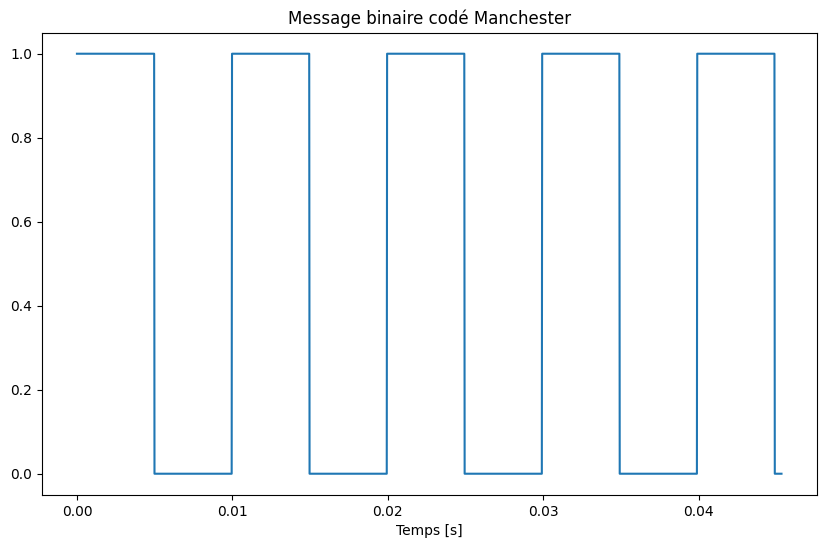

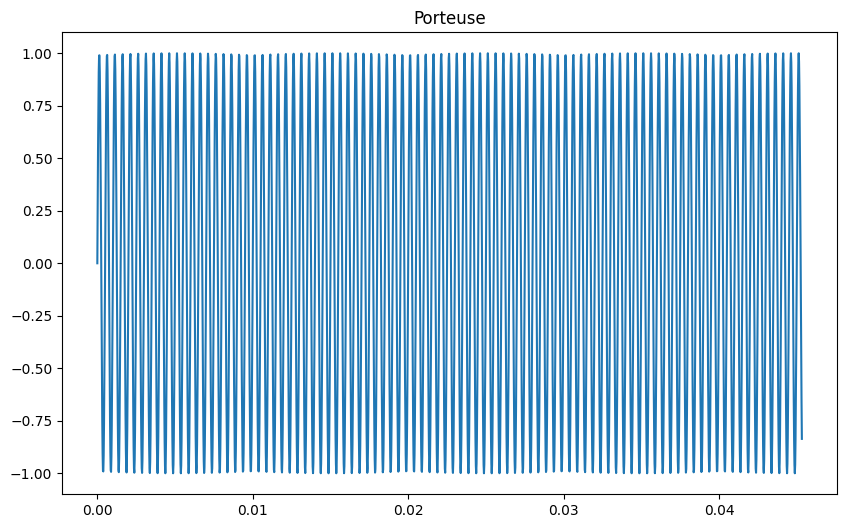

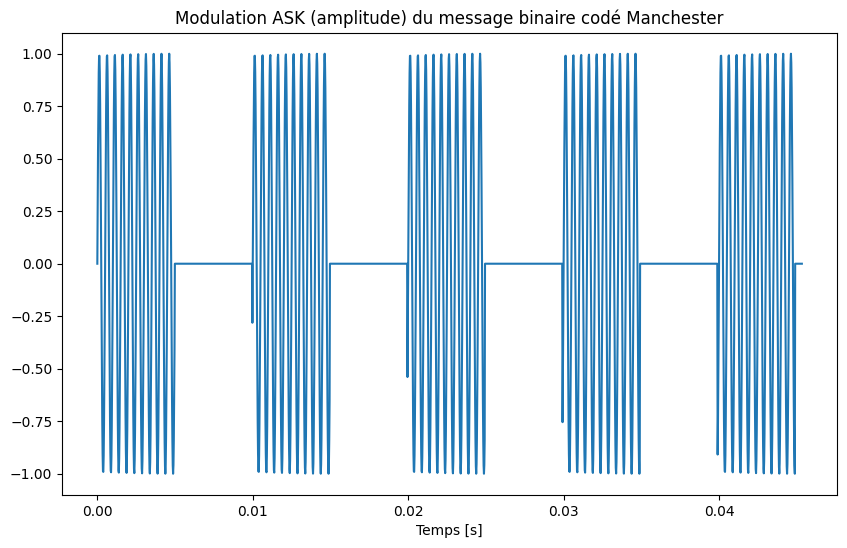

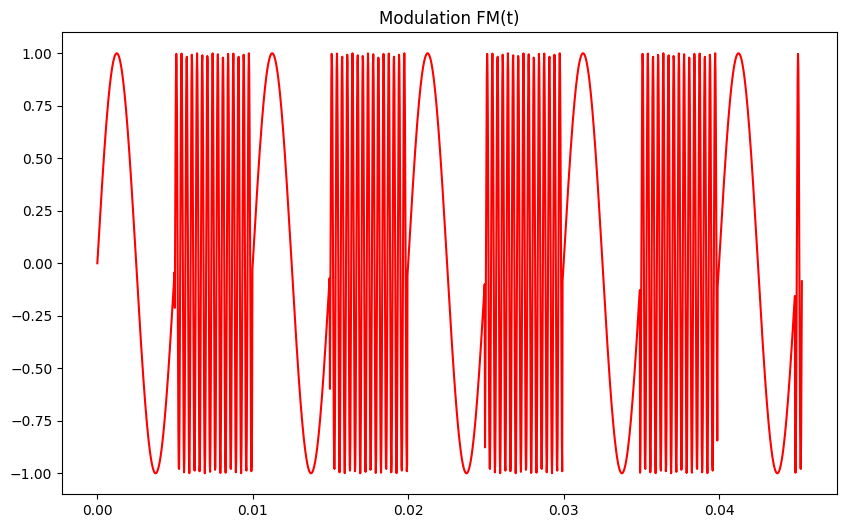

In [37]:
print("""                                                                                      


▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄
██░████░▄▄▀████░███░█▄░▄██░▄▄▄████░▄▄▄██░▄▄▄░█▄▄░▄▄████░▄▄▀██░▄▄▄██░█████░█████░▄▄▄
██░████░▀▀░█████░█░███░███░▄▄▄████░▄▄▄██▄▄▄▀▀███░██████░▄▄▀██░▄▄▄██░█████░█████░▄▄▄
██░▀▀░█░██░█████▄▀▄██▀░▀██░▀▀▀████░▀▀▀██░▀▀▀░███░██████░▀▀░██░▀▀▀██░▀▀░██░▀▀░██░▀▀▀
▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀

Quel type de message souhaitez-vous envoyer ?
    Message écrit -> 1
      """)

suivant = 0

while suivant == 0:
    try:
        reponse = int(input())
        print("Réponse sélectionnée : ", reponse)
        suivant = 1
    except ValueError:
        print("Veuillez sélectionner une réponse valide")

if reponse == 1 :
    message() 

else :
    print("Réponse invalide")

#### <u>Code phase retour</u>
La deuxième partie du programme consiste à récupérer le signal modulé envoyé par la première partie. Ce signal est ensuite démodulé pour récupérer le message transmis.

In [38]:
import numpy as np
import os
import sounddevice as sd

Démodulation ASK et FSK du signal recu

In [39]:
import numpy as np  # Importation de la bibliothèque NumPy

def retourASKetFSK():
    # Lecture du fichier CSV pour obtenir le signal modulé en amplitude (ASK)
    ASK1 = np.genfromtxt("Message.csv")  # Charger les données ASK à partir d'un fichier CSV
    print("Signal modulé ASK: ", ASK1)  # Afficher le signal modulé ASK

    N = len(ASK1)  # Nombre total d'échantillons dans le signal
    Ns = 220  # Nombre d'échantillons par symbole
    Fe = 44100  # Fréquence d'échantillonnage
    Fp = 2000  # Fréquence de la porteuse

    # Vecteur temps
    t = np.arange(0.0, N) / Fe

    # Onde porteuse sinusoïdale à la fréquence Fp
    Porteuse = np.sin(2 * np.pi * Fp * t)

    # Multiplication du signal modulé par le signal de la porteuse
    Produit = ASK1 * Porteuse

    y = []

    # Intégration numérique pour chaque intervalle de Ns échantillons
    for i in range(0, N, Ns):
        y.append(np.trapz(Produit[i:i + Ns], t[i:i + Ns]))

    # Détermination si chaque valeur intégrée est positive
    message_demodule = np.array(y) > 0

    message_recu_decode = []

    # Conversion en séquence binaire
    for ii in range(0, len(message_demodule)):
        if message_demodule[ii] == True:
            message_recu_decode.extend([int(1)])
        else:
            message_recu_decode.extend([int(0)])
    
    print("Signal démodulé ASK: ", message_recu_decode)

    # Lecture du fichier CSV pour obtenir le signal modulé en fréquence (FSK)
    FSK1 = np.genfromtxt("Message2.csv")  # Charger les données FSK à partir d'un fichier CSV
    print("Signal modulé FSK : ", FSK1)  # Afficher le signal modulé FSK

    Fp1 = 200  # Fréquence de la première porteuse
    Fp2 = 3000  # Fréquence de la deuxième porteuse

    # Signaux de porteuse pour chaque fréquence
    S1 = np.sin(2 * np.pi * Fp1 * t)
    S2 = np.sin(2 * np.pi * Fp2 * t)

    # Multiplication de chaque signal de porteuse par le signal modulé en fréquence
    Produit1 = S1 * FSK1
    Produit2 = S2 * FSK1

    Res1 = []
    Res2 = []

    # Intégration numérique pour chaque intervalle de Ns échantillons
    for i in range(0, int(N), int(Ns)):
        Res1.append(np.trapz(Produit1[i:i + int(Ns)]))
        Res2.append(np.trapz(Produit2[i:i + int(Ns)]))

    y = []

    # Comparaison des sommes des valeurs intégrées des deux signaux de porteuse
    for i in range(0, len(Res1)):
        if Res1[i] > Res2[i]:
            y.append(1)
        if Res1[i] < Res2[i]:
            y.append(0)

    print("Signal démodulé FSK:", y)
    return message_recu_decode




Décodage Manchester

In [40]:
def Manchester(bits):
    manchester = []  # Liste pour stocker le résultat du codage Manchester
    
    # Parcours la suite binaire reçue
    for i in range(0, round(len(bits)/2)):  
        # Parcours les éléments deux par deux
        
        if (bits[2*i] == 1 and bits[2*i+1] == 0):  
            # Si on a 1 et 0 à la suite, on ajoute 1 dans une autre liste
            manchester.append(1)  
    
        if (bits[2*i] == 0 and bits[2*i+1] == 1):  
            # Si on a 0 et 1 à la suite, on ajoute 0 dans une autre liste
            manchester.append(0)  
    
    # On affiche les données une fois décodées
    print("Décodage Manchester : ", manchester)  
    return manchester


Vérification de la trame posée

In [41]:
def trame(bits):
    fanion_debut = []  # Liste pour stocker le fanion de début
    fanion_fin = []    # Liste pour stocker le fanion de fin
    type_fichier = ""  # Variable pour stocker le type de fichier

    # Vérification du premier octet (fanion de début)
    for i in bits[0:8]:
        fanion_debut.append(i)
        del bits[0]
    print("Fanion de début : ", fanion_debut)

    # Vérification du dernier octet (fanion de fin)
    for i in bits[-8:]:
        fanion_fin.append(i)
        del bits[-1]
    print("Fanion de fin : ", fanion_fin)

    # Vérification si les fanions de début et de fin sont corrects
    if fanion_debut == [1,1,1,1,1,1,1,1] and fanion_fin == [0,0,0,0,0,0,0,0]:
        print("Début de transmission")
        protocole = []

        # Vérification de l'octet de protocole
        for i in bits[0:8]:
            protocole.append(i)
            del bits[0]
        print("Type de message", protocole)

        # Identification du protocole envoyé
        if protocole == [1,1,0,0,0,0,1,1]:
            print("Nouveau message reçu")
            print("Données", bits)
            type_fichier = "txt"  # Enregistre le type de fichier reçu
            return bits, type_fichier
        else:
            print("Erreur protocole inconnu")
    else:
        print("Erreur fanion manquant dans la trame de données transmise")


Vérification de l'intégrité des données recues( CRC )

In [42]:
def crcreception(bits):
    diviseur = "1001"   #Diviseur pour notre protocole crc (diviseur commun à l'envoyeur et le recepteur)
    resultat_crc = []   #Liste pour stocker les données une fois le reste enlevé et les données vérifié
    integrite_donnee = True

    for e in range(0, len(bits)//12):  #On parcours chaque octet de données plus le reste ajouté
        donne_str = ""
        for i in bits[0:12]:    #On découpe nos données par paquet de 8 bits (octet de données + 4 bits de reste)
            donne_str = donne_str + str(i)
            del bits[0]

        reste_reçu = donne_str[8:]      #On isole l'octet de donnée reçu du reste ajouté dans la phase aller du CRC
        donne_str2 = donne_str[:-4]
        donne_str_dividende = donne_str2 + "0000"
        donne_int_dividende = int("0B" + donne_str_dividende,0) #Converti le dividende en décimal
        diviseur_dec = int("0B" + diviseur,0)   #Converti le diviseur en décimal
        reste = donne_int_dividende % diviseur_dec  #Récupère le reste de la division
        reste_bin = bin(reste)[2:].zfill(4)     #Le reste est en binaire et doit faire obligatoirement 4 bits (exemple : 0010; 1101; 0111...)
        donnee_int = bin(int("0B" + donne_str,0))[2:-4].zfill(8)

        for j in donnee_int: #Ajoute les données dans une liste
            if j == "1":
                resultat_crc.append(1)
            if j == "0":
                resultat_crc.append(0) 
        if reste_reçu == reste_bin: #Vérifie si le reste obtenu correspond au reste reçu
            integrite_donnee = True
        if reste_reçu != reste_bin:
            integrite_donnee = False
    if integrite_donnee:
        print("Aucune erreur de transmission détectée")
        print("Résultat crc", resultat_crc)
        return resultat_crc
    else:
        print("Erreur lors de la transmission des données")


Conversion du message a l'aide du tab le ASCII

In [43]:
def ASCII(bits, type_fichier):
    bin_data = ""  # Initialisation d'une chaîne vide pour stocker les données binaires
    for elem in bits:
        bin_data += str(elem)  # Convertir les bits en une chaîne binaire

    data_reçu = ""  # Initialisation d'une chaîne vide pour stocker les données reçues en ASCII

    def BinaryToDecimal(binary):
        decimal, i = 0, 0  # Initialisation des variables

        # Conversion binaire à décimale
        while(binary != 0):  # Tant que le nombre binaire n'est pas égal à zéro
            dec = binary % 10  # Prendre le dernier chiffre (reste) du nombre binaire
            decimal = decimal + dec * pow(2, i)  # Ajouter la valeur décimale du chiffre au résultat partiel
            binary = binary // 10  # Diviser le nombre binaire par 10 pour passer au chiffre suivant
            i += 1  # Incrémenter le compteur i pour suivre la position du chiffre dans le nombre binaire
        return decimal  # Retourner la valeur décimale résultante


    # Conversion de chaque groupe de 8 bits en caractère ASCII
    for i in range(0, len(bin_data), 8):
        temp_data = int(bin_data[i:i+8])  # Prendre un groupe de 8 bits
        decimal_data = BinaryToDecimal(temp_data)  # Convertir le groupe de 8 bits en décimal
        data_reçu = data_reçu + chr(decimal_data)  # Convertir le décimal en caractère ASCII

    if type_fichier == "txt":
        print("Le message reçu est :", data_reçu)  # Afficher le message reçu en tant que texte
        return data_reçu


Affichage du message recu 

In [44]:
print("""                                                                                    


▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄
██░████░▄▄▀████░███░█▄░▄██░▄▄▄████░▄▄▄██░▄▄▄░█▄▄░▄▄████░▄▄▀██░▄▄▄██░█████░█████░▄▄▄
██░████░▀▀░█████░█░███░███░▄▄▄████░▄▄▄██▄▄▄▀▀███░██████░▄▄▀██░▄▄▄██░█████░█████░▄▄▄
██░▀▀░█░██░█████▄▀▄██▀░▀██░▀▀▀████░▀▀▀██░▀▀▀░███░██████░▀▀░██░▀▀▀██░▀▀░██░▀▀░██░▀▀▀
▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀
""")

signal_reçu = retourASKetFSK() #On démodule le signal
signal_decode = Manchester(signal_reçu) #On décode le signal
donnee, type_fichier = trame(signal_decode) #On vérifie la trame
signal_verif = crcreception(donnee)    #On vérifie l'intégrité des données


                                                                                    


▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄
██░████░▄▄▀████░███░█▄░▄██░▄▄▄████░▄▄▄██░▄▄▄░█▄▄░▄▄████░▄▄▀██░▄▄▄██░█████░█████░▄▄▄
██░████░▀▀░█████░█░███░███░▄▄▄████░▄▄▄██▄▄▄▀▀███░██████░▄▄▀██░▄▄▄██░█████░█████░▄▄▄
██░▀▀░█░██░█████▄▀▄██▀░▀██░▀▀▀████░▀▀▀██░▀▀▀░███░██████░▀▀░██░▀▀▀██░▀▀░██░▀▀░██░▀▀▀
▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀

Signal modulé ASK:  [ 0.        0.281111  0.539551 ... -0.952369 -0.999689 -0.966385]
Signal démodulé ASK:  [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,

Accusé de récéption ( supplementaire)

In [45]:
if type_fichier == "txt":
    ASCII(signal_verif, type_fichier)
# Vérification si le message d'entrée est le même que le message décodé
reste_reçu = crcreception
reste_bin = crcreception


if reste_reçu == reste_bin:
    print("Le message d'entrée est identique au message décodé.")
    
    # Jouer un signal sonore comme accusé de réception
    print("Accusé de réception en cours...")
    
    # Exemple : jouer un signal sonore (on peut remplacer cela par un signal de votre choix)
    signal_acquittement = np.random.random(44100 * 3)  # Signal sonore de 3 secondes (44100 échantillons par seconde)
    sd.play(signal_acquittement, samplerate=44100)
    sd.wait()
else:
    print("Le message d'entrée est différent du message décodé.")

from datetime import datetime

def afficher_heure_reception():
    # Obtenir l'heure actuelle
    heure_actuelle = datetime.now()

    # Formater l'heure au format souhaité
    heure_formatee = heure_actuelle.strftime("%Y-%m-%d %H:%M:%S")

    # Afficher l'heure de réception
    print("Heure de réception des données : ", heure_formatee)

# Appeler la fonction
afficher_heure_reception()


Le message reçu est : lamineEEE1234
Le message d'entrée est identique au message décodé.
Accusé de réception en cours...


Heure de réception des données :  2023-12-17 20:51:14


### <u>Conclusion</u>

Ce projet a été une expérience riche et instructive. Il nous a permis de mettre en pratique nos connaissances en matière de traitement du signal et de communications. Nous avons également appris à travailler en équipe et à présenter nos travaux de manière professionnelle.

La solution proposée est une solution viable pour la communication entre un agent ne disposant que d'un micro et l'agent en charge de l'écoute du réseau. Elle est efficace et relativement simple à mettre en œuvre. Cependant, elle présente quelques limitations qui peuvent être améliorées.



Nous remercions notre tutrice d'avoir été présente pour nous expliquer les étapes à suivre et d'avoir assisté à notre deuxième réussite dans le domaine de l'informatique